# **Reading the Dataset**

The first thing should be to import all the required libraries that will help in reading and understanding the dataset, and then saving it in a pandas dataframe

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [2]:
df = pd.read_csv(r'/kaggle/input/iris/Iris.csv')

# **Performing Exploratory Data Analysis (EDA)**

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


<ipython-input-6-6fd10a524810>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, label=col)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-6-6fd10a524810>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, label=col)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<i

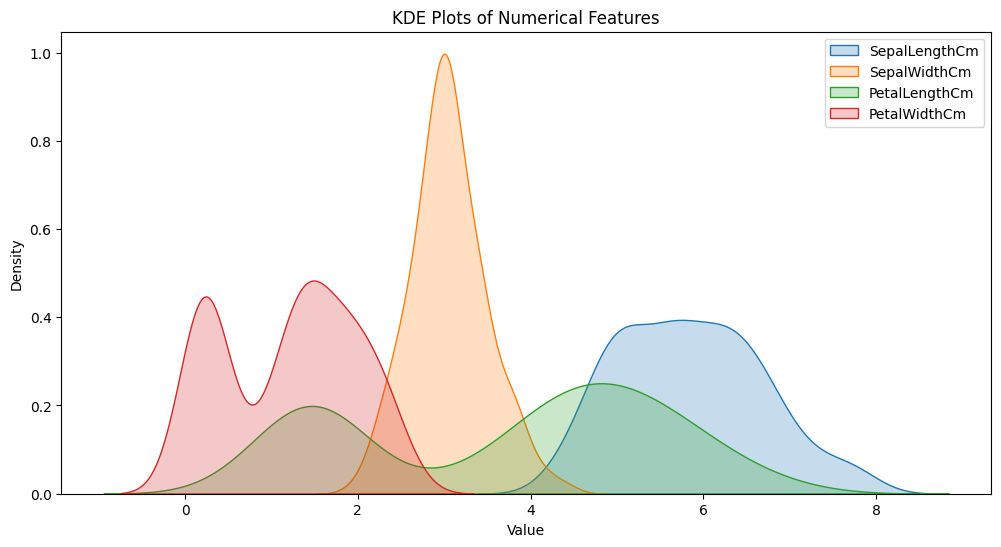

In [6]:
id_column = df['Id']
df = df.drop(columns=['Id'])

numerical_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 6))
for col in numerical_cols:
    sns.kdeplot(df[col], shade=True, label=col)

plt.title("KDE Plots of Numerical Features")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()



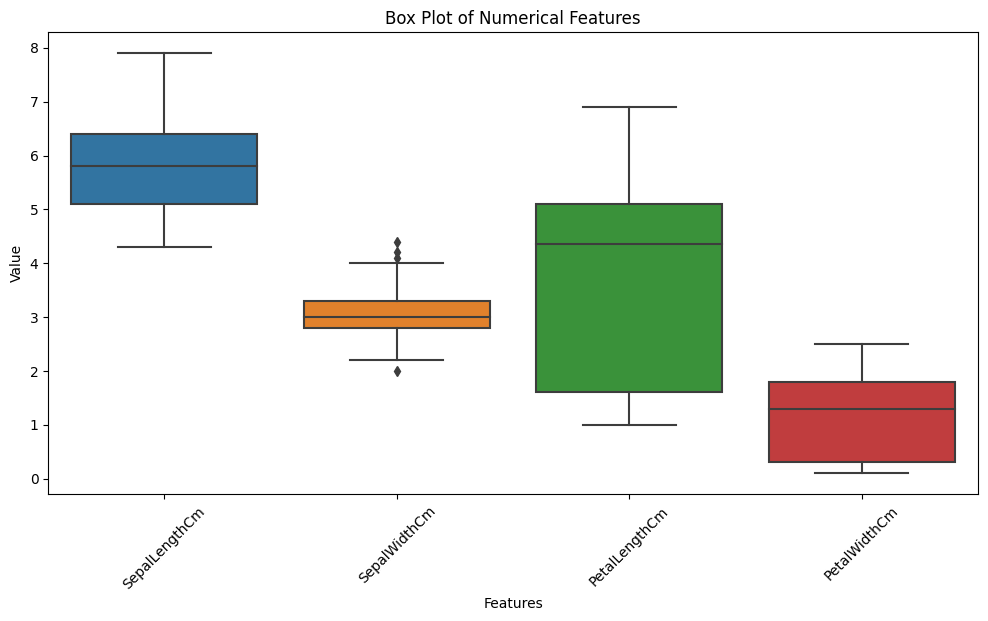

In [7]:
numerical_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Features")
plt.ylabel("Value")
plt.xlabel("Features")
plt.show()



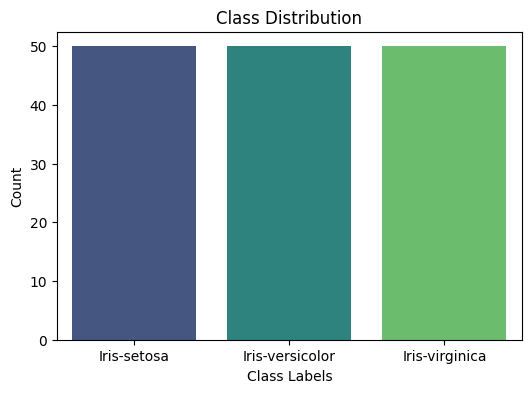

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Species'], palette='viridis')

plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

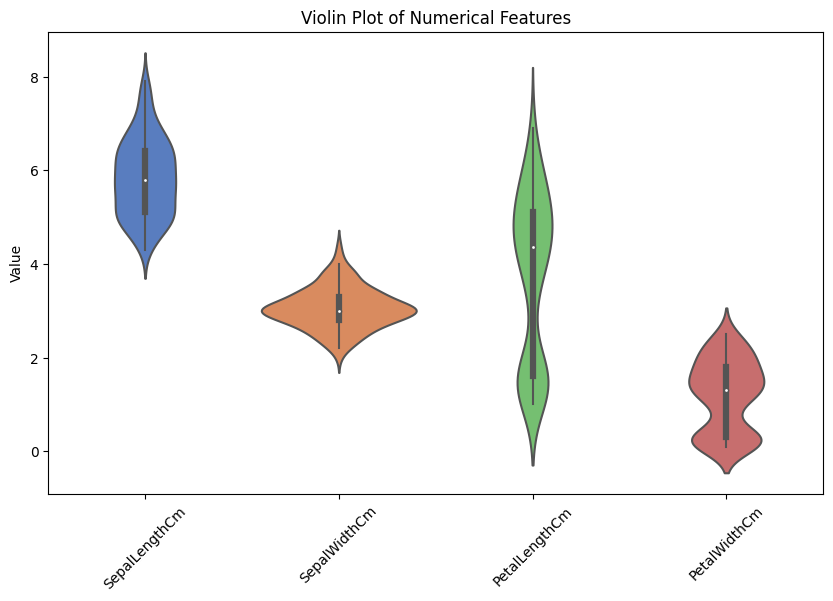

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


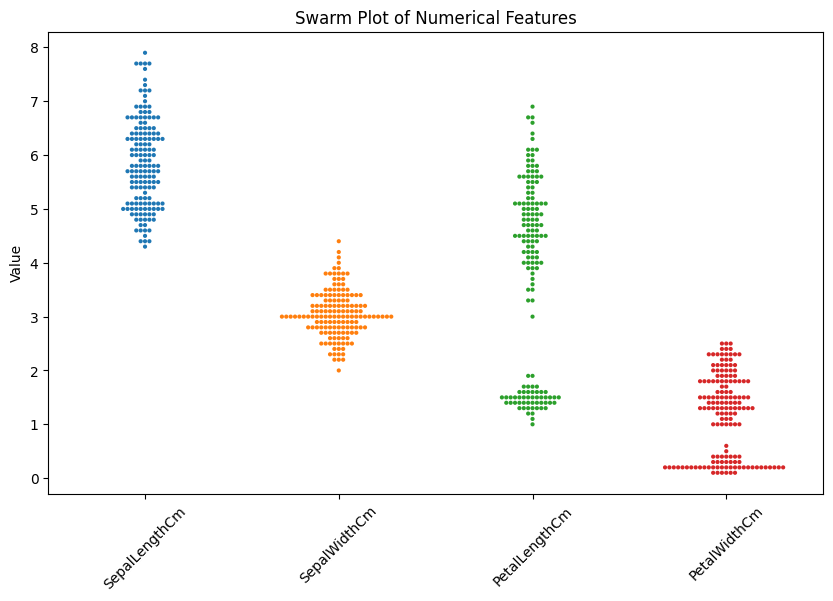

In [9]:
numerical_cols = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

plt.figure(figsize=(10, 6))
sns.violinplot(data=df[numerical_cols], palette="muted")
plt.title("Violin Plot of Numerical Features")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.swarmplot(data=df[numerical_cols], size=3)
plt.title("Swarm Plot of Numerical Features")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

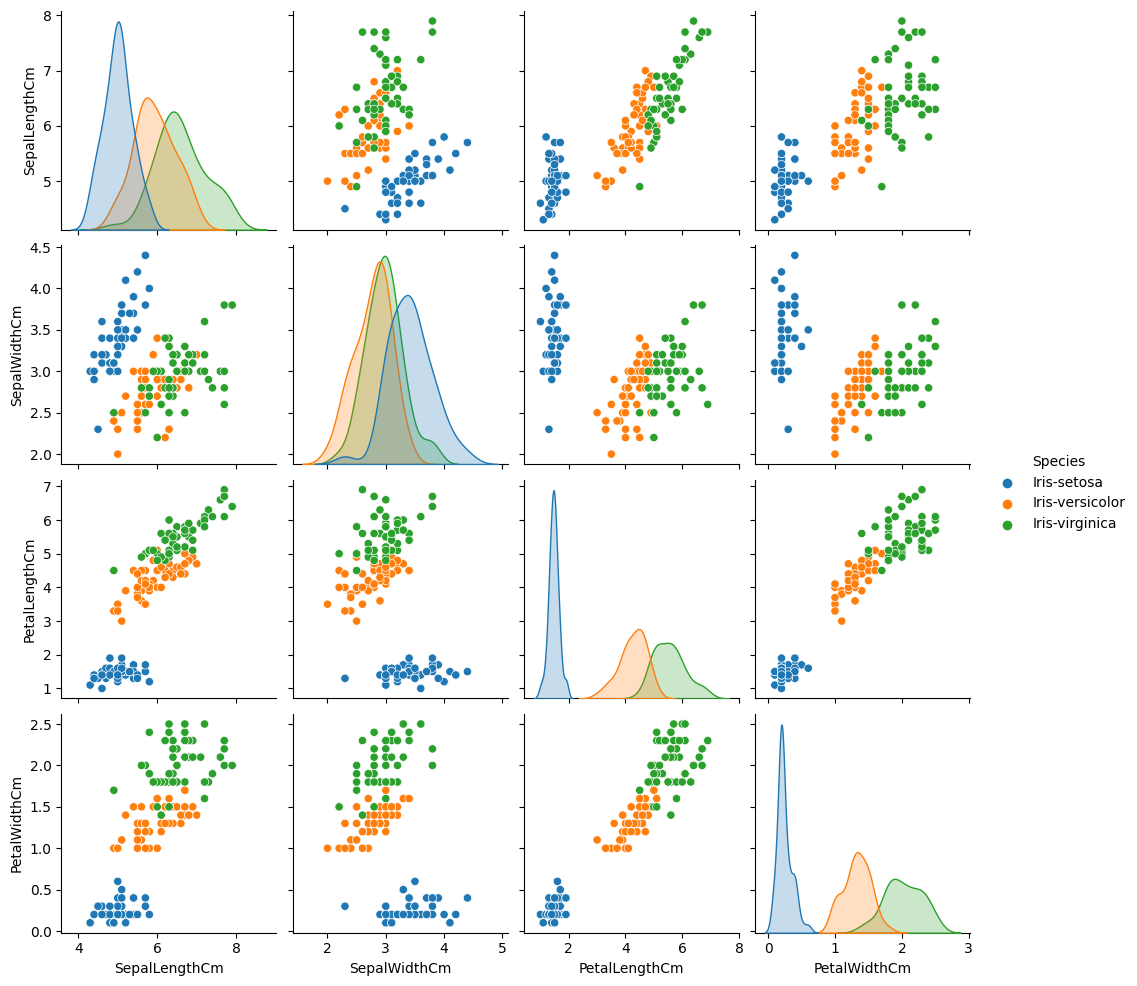

In [10]:
sns.pairplot(df, hue="Species", diag_kind="kde")  
plt.show()

# **Model Training**

In [11]:
X = df.drop(columns=["Species"]) 
y = df["Species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")

Training Data: (120, 4), Testing Data: (30, 4)


In [12]:
def create_pipeline():
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()) 
    ])
    return pipeline

pipeline = create_pipeline()

X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)
print("Normalization complete!")

Normalization complete!


In [13]:
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.90
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.80      0.84        10
 Iris-virginica       0.82      0.90      0.86        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga']  # Different optimization solvers
}

# Initialize model
model = LogisticRegression(max_iter=5000)

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Evaluate on Test Set
y_pred_best = best_model.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Optimized Model Accuracy: {accuracy_best:.2f}")

print(classification_report(y_test, y_pred_best))


Best Parameters: {'C': 100, 'solver': 'lbfgs'}
Optimized Model Accuracy: 0.97
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, None, 1, 2],
    'min_samples_split': [2, 5, 10, 20, 25],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

from sklearn.metrics import classification_report, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Optimized Model Accuracy: {accuracy:.2f}")
print(report)



Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimized Model Accuracy: 0.93
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)  # Train using scaled features
rf_best = rf_grid.best_estimator_

y_pred = rf_best.predict(X_test_scaled)

print("Best Parameters:", rf_grid.best_params_)
rf_accuracy = accuracy_score(y_test, y_pred)
print("Optimized Model Accuracy:", rf_accuracy)
print(classification_report(y_test, y_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Optimized Model Accuracy: 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define individual models
log_reg = LogisticRegression(C=10, solver='lbfgs', max_iter=500, random_state=42)
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42)
rf = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Create Voting Classifier
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('dt', dt), ('rf', rf)], voting='soft') 

# Train ensemble model
voting_clf.fit(X_train_scaled, y_train)

# Evaluate model
ensemble_accuracy = voting_clf.score(X_test_scaled, y_test)
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.2f}")


Ensemble Model Accuracy: 0.97


In [18]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define individual models
log_reg = LogisticRegression(C=10, solver='lbfgs', max_iter=500, random_state=42)
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42)
rf = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
ab = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=42)

# Create Voting Classifier
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('dt', dt), ('rf', rf), ('gb', gb), ('ab', ab)], voting='soft') 

# Train ensemble model
voting_clf.fit(X_train_scaled, y_train)

# Evaluate model
ensemble_accuracy = voting_clf.score(X_test_scaled, y_test)
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.2f}")

Ensemble Model Accuracy: 0.97


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 1, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Define KNN model
knn = KNeighborsClassifier()

# Hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model
tuned_knn = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate model
knn_accuracy = tuned_knn.score(X_test_scaled, y_test)
print(f"Best Parameters: {best_params}")
print(f"Optimized KNN Model Accuracy: {knn_accuracy:.2f}")

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Optimized KNN Model Accuracy: 1.00


In [20]:
import joblib
joblib.dump(tuned_knn, '/kaggle/working/Iris_Flower_knn_model.pkl')

['/kaggle/working/Iris_Flower_knn_model.pkl']